In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

In [63]:
data = pd.read_csv("VLagun_PhysChem_Years4.csv")
X = data.iloc[:,0:19]
Y = data.iloc[:,:20]
features_names = data.columns
data.head()

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,PN,TN/TP,Fe,SiO4Si,DOC,TPOC,Windspeedinsitu,Depth,DINtoDIP,Years
0,3.757624,9.46,18.3,52.0,3.5,11.7,185.0,0.039,0.022,0.551,0.759,6.848152,0.0121,2.3112,7.500,8.5650,3.5,3.3,17.428571,0
1,3.504707,9.89,19.1,50.0,4.4,17.5,111.3,0.020,0.025,0.123,1.181,10.127628,0.0136,2.1157,7.860,8.5200,0.0,3.6,10.227273,0
2,3.757624,9.66,18.1,59.0,3.2,22.8,103.4,0.016,0.008,0.582,0.576,9.134467,0.0368,2.2641,8.172,8.4915,1.0,3.4,7.500000,0
3,3.107266,10.36,19.5,46.0,4.3,22.3,92.7,0.026,0.021,0.693,0.689,11.978206,0.0172,2.2623,7.848,8.8320,0.0,2.9,10.930233,0
4,2.619498,11.56,19.0,42.0,11.7,30.3,73.2,0.022,0.048,0.383,1.006,12.664931,0.0237,2.2164,7.536,9.2400,0.0,3.0,5.982906,0


In [64]:
data.shape

(120, 20)

In [65]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [66]:
rf = RandomForestRegressor(n_estimators= 100, random_state=42)

rf.fit(X,Y)

importances = rf.feature_importances_

for feature, importance in zip(X.columns, importances):
  np.argsort(importance)
  print(feature, importance)

PSU 0.010096722266383125
O2 0.009653803029991326
temp. 0.010816781711131042
SS 0.1803669841903031
SRP 0.02166841943331176
DOP 0.051093251115369484
PP 0.61548778062501
NH4N 0.006135261773155234
NO3N 0.00709329192252059
DON 0.006560546465375157
PN 0.008649730243208318
TN/TP 0.0044068273967890126
Fe 0.006773212319734357
SiO4Si 0.006994303779796534
DOC 0.006414404073294594
TPOC 0.015524016465321021
Windspeedinsitu 0.00521031638170925
Depth 0.007567304133271214
DINtoDIP 0.01948704267432502


In [67]:
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance,3)) for feature, importance in zip(X, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print(f'Variable:{pair[0]:31} Importance: {pair[1]}') for pair in feature_importances];

Variable:PP                              Importance: 0.615
Variable:SS                              Importance: 0.18
Variable:DOP                             Importance: 0.051
Variable:SRP                             Importance: 0.022
Variable:DINtoDIP                        Importance: 0.019
Variable:TPOC                            Importance: 0.016
Variable:temp.                           Importance: 0.011
Variable:PSU                             Importance: 0.01
Variable:O2                              Importance: 0.01
Variable:PN                              Importance: 0.009
Variable:Depth                           Importance: 0.008
Variable:NO3N                            Importance: 0.007
Variable:DON                             Importance: 0.007
Variable:Fe                              Importance: 0.007
Variable:SiO4Si                          Importance: 0.007
Variable:NH4N                            Importance: 0.006
Variable:DOC                             Importance: 0.006


In [68]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing, tree, metrics

In [69]:
estimator_rf = RandomForestRegressor(
    n_jobs=1,
    n_estimators=100,
    random_state=42)

In [70]:
estimator_rf.fit(X,Y)

RandomForestRegressor(n_jobs=1, random_state=42)

In [71]:
feature_importance_df = pd.DataFrame(estimator_rf.feature_importances_, index= X.columns.values, columns=["Importance"])
feature_importance_df

,Importance
PSU,0.010097
O2,0.009654
temp.,0.010817
SS,0.180367
SRP,0.021668
DOP,0.051093
PP,0.615488
NH4N,0.006135
NO3N,0.007093
DON,0.006561


In [72]:
feature_importance_df.sort_values(by="Importance", inplace=True, ascending= False)

<Axes: >

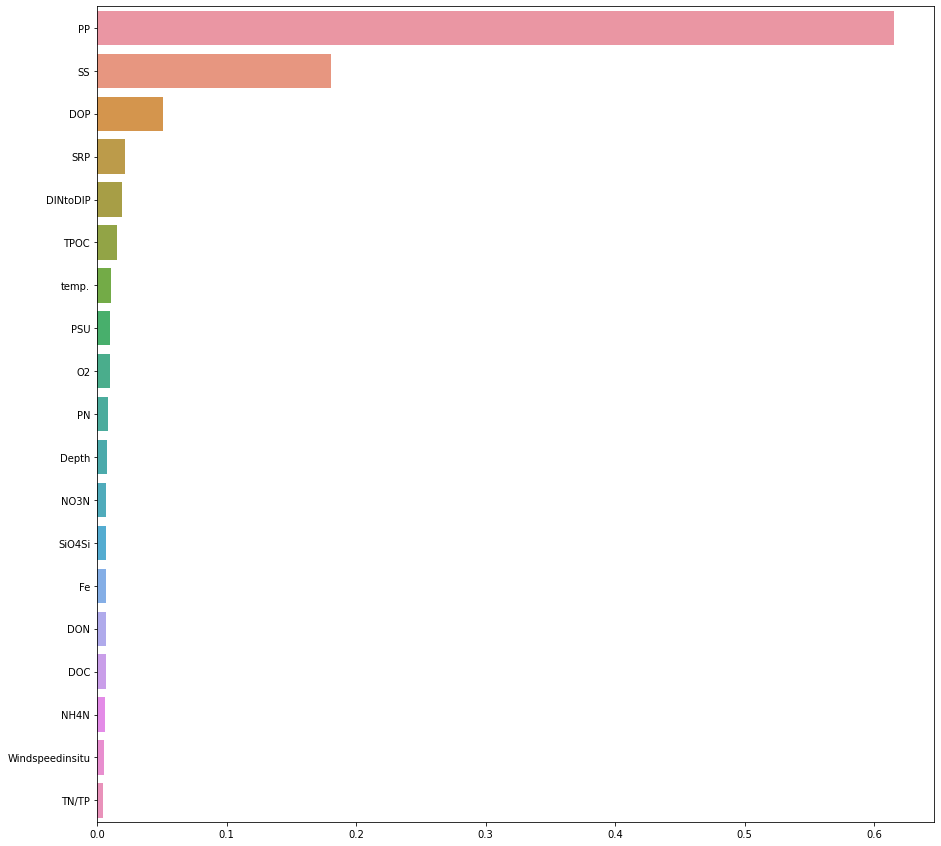

In [73]:
plt.figure(figsize =(15,15))
sns.barplot(data=feature_importance_df, x=feature_importance_df.values.flatten(), y= feature_importance_df.index.values)

In [74]:
%%shell
jupyter nbconvert --to html ///content/Random_forest_big_data.ipynb

[NbConvertApp] Converting notebook ///content/Random_forest_big_data.ipynb to html
[NbConvertApp] Writing 687647 bytes to /content/Random_forest_big_data.html
